#Loading Google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Loading Packages

In [2]:

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

import keras
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


#Loading CIFAR 10 dataset

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


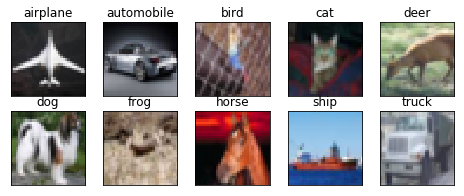

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

#Resnet Model

In [0]:
from __future__ import division

import six
import keras
from keras.models import Model
from keras.layers import Convolution2D,SeparableConv2D
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten
)
from keras.layers.convolutional import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from keras.layers.merge import add,concatenate
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K

def _bn_relu(input):
    """Helper to build a BN -> relu block
    """
    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)
    return Activation("relu")(norm)
  
def _conv_bn_relu(**conv_params):
    """Helper to build a conv -> BN -> relu block
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))
    
    def f(input):
        conv = SeparableConv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding,
                               data_format=None, dilation_rate=(1, 1), depth_multiplier=1, 
                               activation=None, use_bias=True, depthwise_initializer=kernel_initializer,
                               pointwise_initializer=kernel_initializer, bias_initializer='zeros',
                               depthwise_regularizer=kernel_regularizer, pointwise_regularizer=kernel_regularizer, bias_regularizer=None, activity_regularizer=None, 
                               depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)(input)
        
#         Conv2D(filters=filters, kernel_size=kernel_size,
#                       strides=strides, padding=padding,
#                       kernel_initializer=kernel_initializer,
#                       kernel_regularizer=kernel_regularizer)(input)
        return _bn_relu(conv)

    return f  

def _bn_relu_conv(**conv_params):
    """Helper to build a BN -> relu -> conv block.
    This is an improved scheme proposed in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    filters = conv_params["filters"]
    kernel_size = conv_params["kernel_size"]
    strides = conv_params.setdefault("strides", (1, 1))
    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")
    padding = conv_params.setdefault("padding", "same")
    kernel_regularizer = conv_params.setdefault("kernel_regularizer", l2(1.e-4))

    def f(input):
        activation = _bn_relu(input)
        return SeparableConv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding,
                               data_format=None, dilation_rate=(1, 1), depth_multiplier=1, 
                               activation=None, use_bias=True, depthwise_initializer=kernel_initializer,
                               pointwise_initializer=kernel_initializer, bias_initializer='zeros',
                               depthwise_regularizer=kernel_regularizer, pointwise_regularizer=kernel_regularizer,
                               bias_regularizer=None, activity_regularizer=None, 
                               depthwise_constraint=None, pointwise_constraint=None,
                               bias_constraint=None)(activation)
        
#       Conv2D(filters=filters, kernel_size=kernel_size,
#                       strides=strides, padding=padding,
#                       kernel_initializer=kernel_initializer,
#                       kernel_regularizer=kernel_regularizer)(activation)

    return f

def _shortcut(input, residual):
    """Adds a shortcut between input and residual block and merges them with "sum"
    """
    # Expand channels of shortcut to match residual.
    # Stride appropriately to match residual (width, height)
    # Should be int if network architecture is correctly configured.
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_width = int(round(input_shape[ROW_AXIS] / residual_shape[ROW_AXIS]))
    stride_height = int(round(input_shape[COL_AXIS] / residual_shape[COL_AXIS]))
    equal_channels = input_shape[CHANNEL_AXIS] == residual_shape[CHANNEL_AXIS]

    shortcut = input
    # 1 X 1 conv if shape is different. Else identity.
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        shortcut = Conv2D(filters=residual_shape[CHANNEL_AXIS],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_initializer="he_normal",
                          kernel_regularizer=l2(0.0001))(input)

    return concatenate([shortcut, residual])

#     return add([shortcut, residual])
  
def _residual_block(block_function, filters, repetitions, is_first_layer=False):
    """Builds a residual block with repeating bottleneck blocks.
    """
    def f(input):
        for i in range(repetitions):
            init_strides = (1, 1)
            if i == 0 and not is_first_layer:
                init_strides = (2, 2)
            input = block_function(filters=filters, init_strides=init_strides,
                                   is_first_block_of_first_layer=(is_first_layer and i == 0))(input)
        return input

    return f

  
def basic_block(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Basic 3 X 3 convolution blocks for use on resnets with layers <= 34.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv1 = SeparableConv2D(filters=filters, kernel_size=(3, 3), strides=init_strides, padding="same",
                                    data_format=None, dilation_rate=(1, 1), depth_multiplier=1, 
                                    activation=None, use_bias=True, depthwise_initializer="he_normal",
                                    pointwise_initializer="he_normal", bias_initializer='zeros',
                                    depthwise_regularizer=l2(1e-4), pointwise_regularizer=l2(1e-4),
                                    bias_regularizer=None, activity_regularizer=None, 
                                    depthwise_constraint=None, pointwise_constraint=None,
                                    bias_constraint=None)(input)
#             Conv2D(filters=filters, kernel_size=(3, 3),
#                            strides=init_strides,
#                            padding="same",
#                            kernel_initializer="he_normal",
#                            kernel_regularizer=l2(1e-4))(input)
        else:
            conv1 = _bn_relu_conv(filters=filters, kernel_size=(3, 3),
                                  strides=init_strides)(input)

        residual = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv1)
#         residual = keras.layers.GaussianNoise(.5)(residual)
        return _shortcut(input, residual)

    return f

  
def bottleneck(filters, init_strides=(1, 1), is_first_block_of_first_layer=False):
    """Bottleneck architecture for > 34 layer resnet.
    Follows improved proposed scheme in http://arxiv.org/pdf/1603.05027v2.pdf
    Returns:
        A final conv layer of filters * 4
    """
    def f(input):

        if is_first_block_of_first_layer:
            # don't repeat bn->relu since we just did bn->relu->maxpool
            conv_1_1 = Conv2D(filters=filters, kernel_size=(1, 1),
                              strides=init_strides,
                              padding="same",
                              kernel_initializer="he_normal",
                              kernel_regularizer=l2(1e-4))(input)
        else:
            conv_1_1 = _bn_relu_conv(filters=filters, kernel_size=(1, 1),
                                     strides=init_strides)(input)

        conv_3_3 = _bn_relu_conv(filters=filters, kernel_size=(3, 3))(conv_1_1)
        residual = _bn_relu_conv(filters=filters *4, kernel_size=(1, 1))(conv_3_3)
        return _shortcut(input, residual)

    return f
  
def _handle_dim_ordering():
    global ROW_AXIS
    global COL_AXIS
    global CHANNEL_AXIS
    if K.image_dim_ordering() == 'tf':
        ROW_AXIS = 1
        COL_AXIS = 2
        CHANNEL_AXIS = 3
    else:
        CHANNEL_AXIS = 1
        ROW_AXIS = 2
        COL_AXIS = 3


def _get_block(identifier):
    if isinstance(identifier, six.string_types):
        res = globals().get(identifier)
        if not res:
            raise ValueError('Invalid {}'.format(identifier))
        return res
    return identifier

class ResnetBuilder(object):
    @staticmethod
    def build(input_shape, num_outputs, block_fn, repetitions):
     
        _handle_dim_ordering()
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple (nb_channels, nb_rows, nb_cols)")

        # Permute dimension order if necessary
        if K.image_dim_ordering() == 'tf':
            input_shape = (input_shape[0], input_shape[1], input_shape[2])

        # Load function from str if needed.
        block_fn = _get_block(block_fn)

        input = Input(shape=input_shape)

        conv1 = _conv_bn_relu(filters=64, kernel_size=(7, 7), strides=(2, 2))(input)

#         conv1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)

        

        block = conv1 #pool1
        filters = 64
        for i, r in enumerate(repetitions):
            block = _residual_block(block_fn, filters=filters, repetitions=r, is_first_layer=(i == 0))(block)

              
            filters *= 2

        # Last activation
        block = _bn_relu(block)

       # Classifier block
        block_shape = K.int_shape(block)
        pool2 = AveragePooling2D(pool_size=(block_shape[ROW_AXIS], block_shape[COL_AXIS]),
                                 strides=(1, 1))(block)

        conv2 =(Convolution2D(num_outputs,(1, 1)))(pool2)
        
        op = conv2
        flatten1 = Flatten()(op)#(activation="softmax")

        activation = Activation("softmax")(flatten1)
        
        model = Model(inputs=input, outputs=activation)
   
        return model


    @staticmethod
    def build_resnet_50(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, bottleneck, [3, 4, 6, 3])
      
    @staticmethod
    def build_resnet_18(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [2, 2, 2,2 ])
      
    @staticmethod
    def build_resnet_34(input_shape, num_outputs):
        return ResnetBuilder.build(input_shape, num_outputs, basic_block, [3, 4, 6, 3])

In [10]:
model = ResnetBuilder.build_resnet_18((32,32,3),10)
model.summary()

W0707 11:44:25.051513 139922374305664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 11:44:25.095816 139922374305664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 11:44:25.103779 139922374305664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0707 11:44:25.173168 139922374305664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 11:44:25.174780

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 16, 16, 64)   403         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16, 16, 64)   256         separable_conv2d_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 16, 16, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
separable_

#Cutout Augmentation

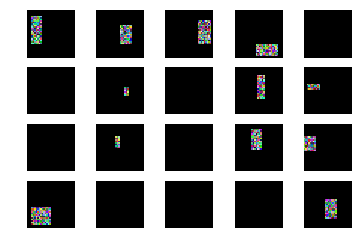

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.2, r_1=0.5, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser
  
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from random_eraser import get_random_eraser

cols, rows = 5, 4
img_num = cols * rows

x = np.zeros((img_num, 32, 32, 3), dtype=np.uint8)

eraser = get_random_eraser(pixel_level=True)

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(eraser(x[i]), interpolation="nearest")
    plt.axis('off')

In [0]:
datagen = ImageDataGenerator(#zoom_range=.25, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=20,
                             width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              horizontal_flip=True,                           
#                              vertical_flip=True
                            )

old_gen = datagen.flow(train_features, train_labels, batch_size = 128)



from itertools import chain



def cut_out_gen(batches):
   eraser = get_random_eraser(pixel_level=True)
  
   while True:
        batch_x, batch_y = next(batches)
#         batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_x[i] = eraser(batch_x[i])
        yield (batch_x, batch_y)
    
    
tr_cut_out = cut_out_gen(old_gen)

tr = chain(old_gen,tr_cut_out)

#Fitting the model

In [0]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EIP-Phase 2/1/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

from keras.optimizers import Adam
# from keras.callbacks import LearningRateScheduler

# def scheduler(epoch, lr):
#   return round(0.002 * 1/(1 + 0.119 * epoch), 10)


from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
sgd = optimizers.SGD( lr=0.01, decay=1e-6, momentum=0.9,nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,#'Adam(0.1)',
              metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(tr,
                                 steps_per_epoch = 390,
#                                  samples_per_epoch = train_features.shape[0],
                                 nb_epoch = 50, 
                                 callbacks=[checkpoint],#,LearningRateScheduler(scheduler, verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<itertools..., steps_per_epoch=390, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, epochs=50)`


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 32s 83ms/step - loss: 2.7619 - acc: 0.4169 - val_loss: 2.8340 - val_acc: 0.4233

Epoch 00001: val_acc improved from -inf to 0.42330, saving model to /content/gdrive/My Drive/Colab Notebooks/EIP-Phase 2/1/epochs:001-val_acc:0.423.hdf5
Epoch 2/50
390/390 [==============================] - 27s 69ms/step - loss: 2.4739 - acc: 0.5165 - val_loss: 2.9096 - val_acc: 0.4337

Epoch 00002: val_acc improved from 0.42330 to 0.43370, saving model to /content/gdrive/My Drive/Colab Notebooks/EIP-Phase 2/1/epochs:002-val_acc:0.434.hdf5
Epoch 3/50
390/390 [==============================] - 27s 69ms/step - loss: 2.3236 - acc: 0.5696 - val_loss: 2.6981 - val_acc: 0.4953

Epoch 00003: val_acc improved from 0.43370 to 0.49530, saving model to /content/gdrive/My Drive/Colab Notebooks/EIP-Phase 2/1/epochs:003-val_acc:0.495.hdf5
Epoch 4/50
390/390 [==============================] - 27s 69ms/step - loss: 2.2102 - acc: 0.6073 - val_loss: 2.6263 - val_acc: 0.5241

Epoch 

Model took 1358.28 seconds to train


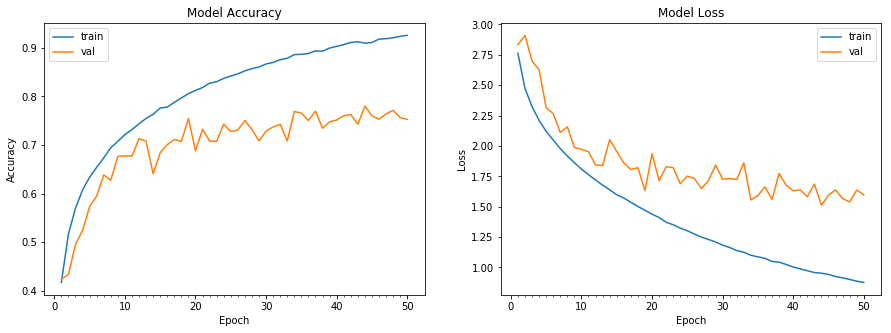

Accuracy on test data is: 75.29


In [0]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#Loading weights

In [11]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EIP-Phase 2/1/epochs:044-val_acc:0.780.hdf5')

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

score = model.evaluate(test_features, test_labels)#, steps = 10,verbose=0)
print(score[1])

W0707 11:45:08.109447 139922374305664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



10000/10000 [==============================] - 7s 750us/step
0.7802


In [0]:
test_pred =  model.predict(test_features)

In [13]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
test_pred

array([[7.1791978e-06, 3.4057896e-07, 5.1444721e-07, ..., 2.3847321e-07,
        2.1491039e-06, 6.1461128e-06],
       [7.8148732e-05, 1.3910894e-03, 1.8189281e-10, ..., 2.5137030e-13,
        9.9851638e-01, 1.4390260e-05],
       [2.8573442e-03, 1.3616022e-04, 1.2237705e-07, ..., 2.6258238e-04,
        9.9645269e-01, 2.8495109e-04],
       ...,
       [2.2609707e-09, 8.5142000e-09, 1.4240148e-04, ..., 7.4235839e-04,
        5.1425012e-08, 1.3534483e-05],
       [2.8171255e-06, 9.9997449e-01, 1.4668962e-05, ..., 2.7273637e-07,
        2.5912980e-08, 1.3703426e-06],
       [6.6401338e-07, 6.8690842e-10, 9.4687393e-06, ..., 9.5958865e-01,
        6.1700050e-08, 5.9015298e-10]], dtype=float32)

In [15]:
# (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

test_pred= test_pred.round()
test_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
test_pred = np.argmax(test_pred,axis=1)

In [17]:
test_pred

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
test_labels = np.argmax(test_labels,axis=1)

#Indexing the misclassied images

In [19]:
mis =[]
corr = []
for i in range(len(test_labels)):

  if (test_labels[i] == test_pred[i]):
    corr.append(i)

  else :
    mis.append(i)

print(len(corr))
print(len(mis))

7690
2310


In [0]:
mis_classified = []
for i in mis:
  mis_classified.append(test_features[i])

bird
airplane


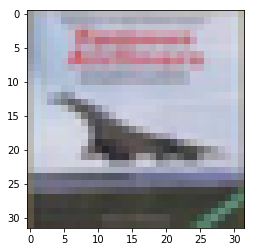

In [21]:
# plt.imshow(mis_classified[0])
# print(class_names[test_pred[mis[0]]])
# print(class_names[test_labels[mis[0]]])
# plt.show()

In [0]:
from keras.preprocessing import image
# import keras.backend as K
# import numpy as np
import cv2
import sys
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

#Plotting the misclassified images and respective GradCAM images

airplane
Original


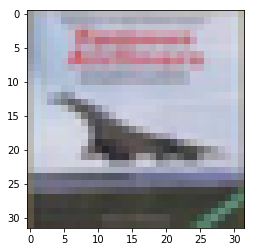

Gradcam


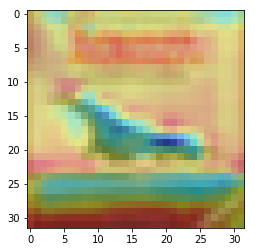

cat
Original


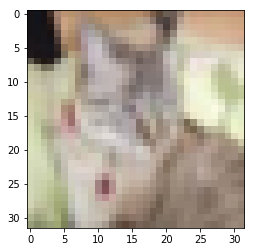

Gradcam


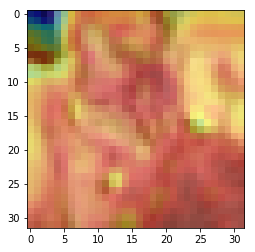

automobile
Original


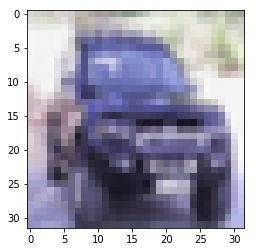

Gradcam


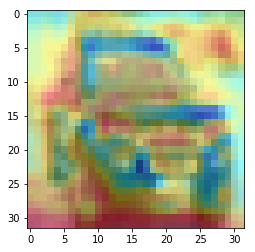

airplane
Original


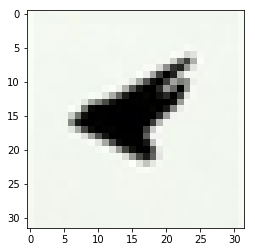

Gradcam


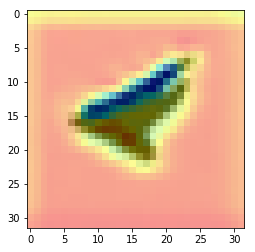

dog
Original


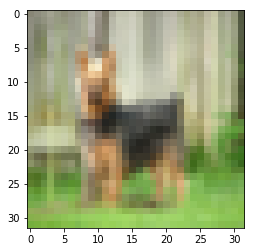

Gradcam


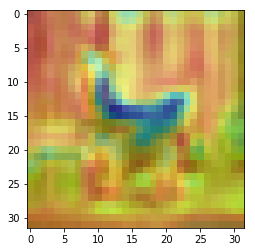

dog
Original


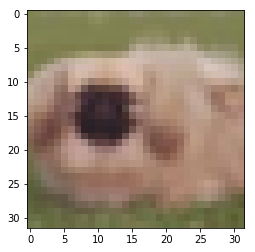

Gradcam


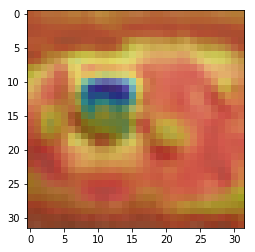

deer
Original


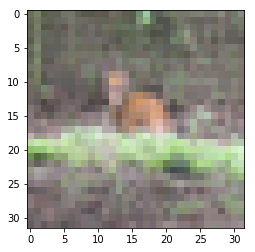

Gradcam


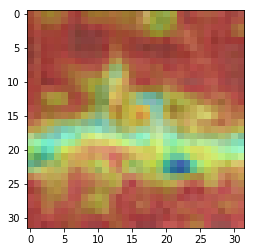

dog
Original


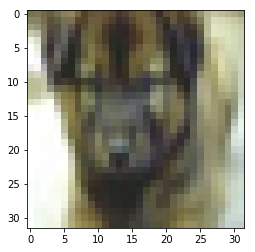

Gradcam


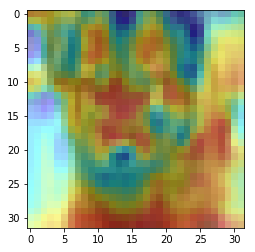

bird
Original


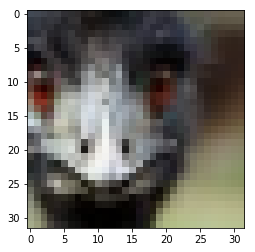

Gradcam


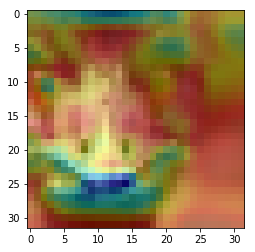

automobile
Original


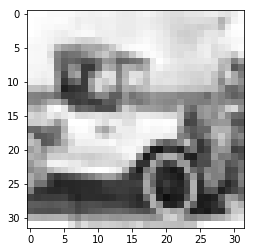

Gradcam


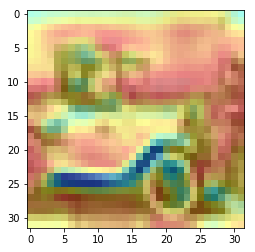

horse
Original


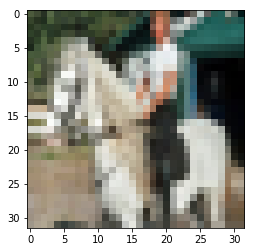

Gradcam


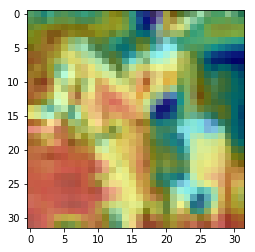

horse
Original


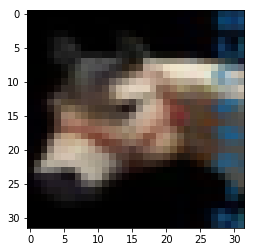

Gradcam


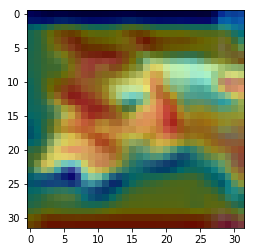

deer
Original


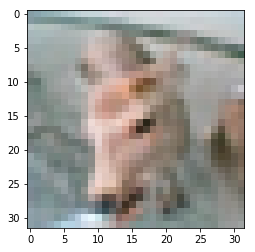

Gradcam


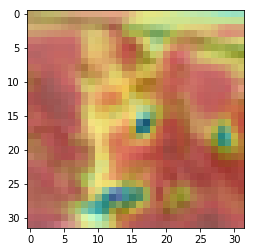

frog
Original


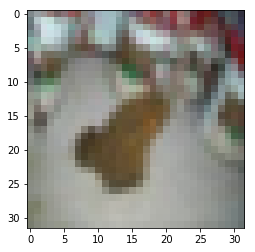

Gradcam


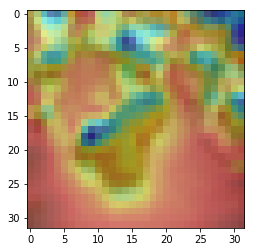

cat
Original


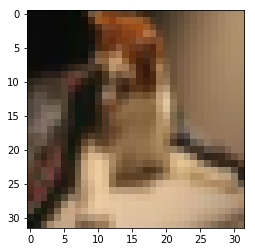

Gradcam


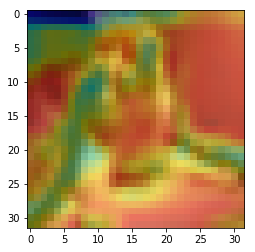

horse
Original


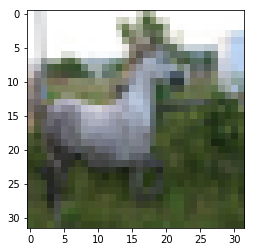

Gradcam


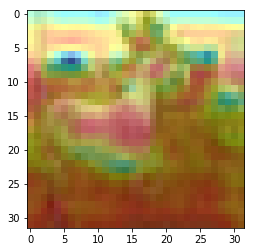

truck
Original


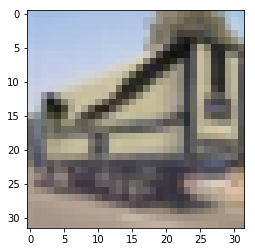

Gradcam


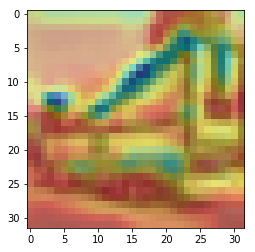

dog
Original


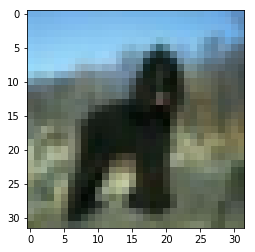

Gradcam


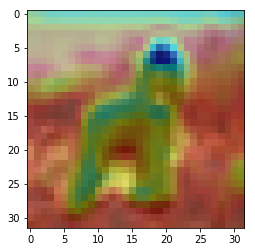

horse
Original


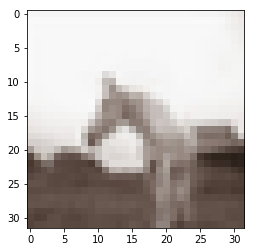

Gradcam


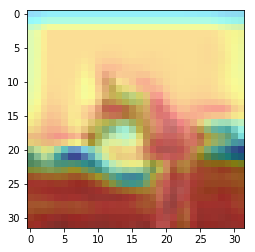

cat
Original


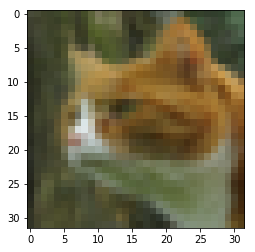

Gradcam


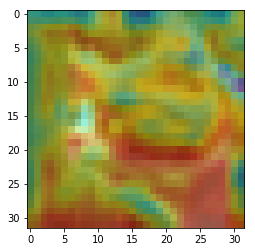

deer
Original


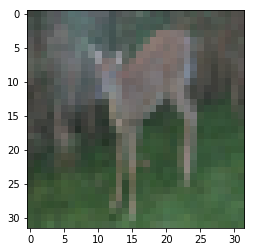

Gradcam


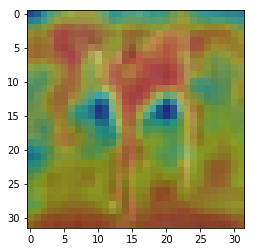

airplane
Original


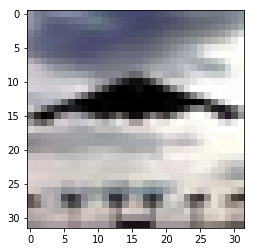

Gradcam


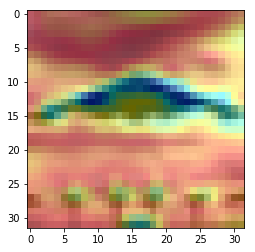

cat
Original


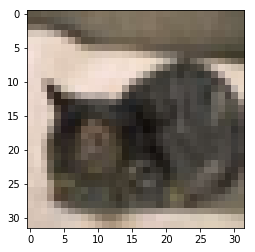

Gradcam


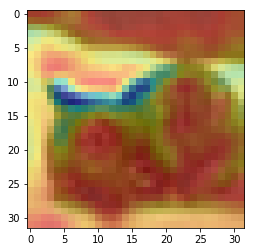

bird
Original


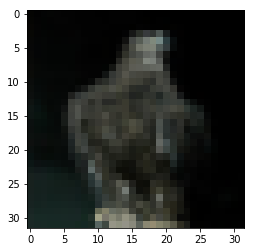

Gradcam


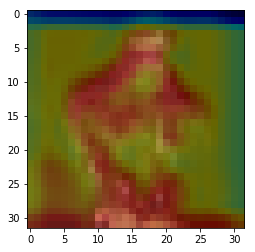

ship
Original


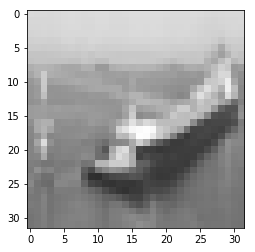

Gradcam


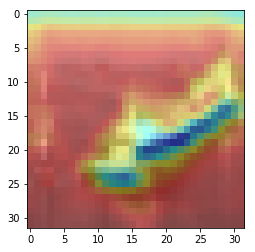

airplane
Original


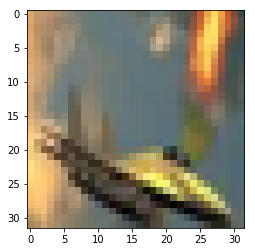

Gradcam


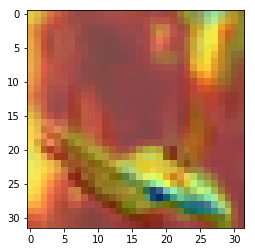

bird
Original


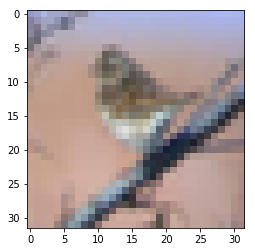

Gradcam


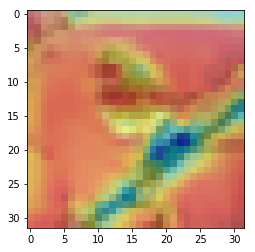

truck
Original


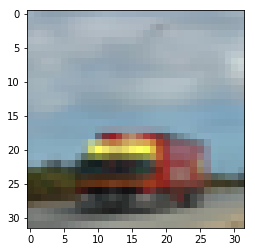

Gradcam


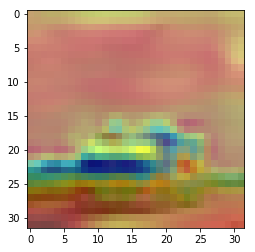

horse
Original


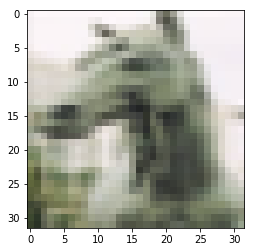

Gradcam


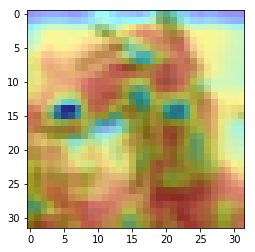

bird
Original


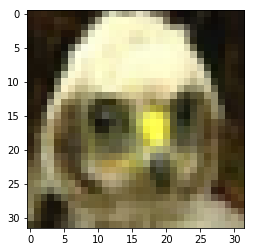

Gradcam


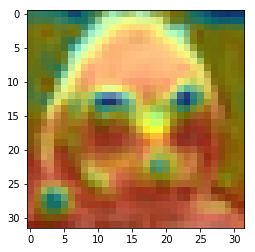

airplane
Original


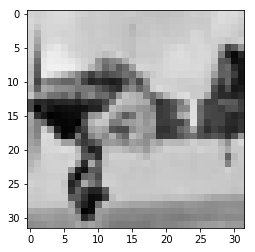

Gradcam


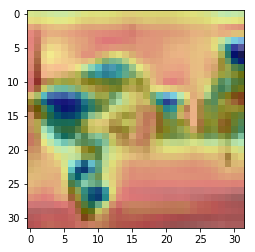

dog
Original


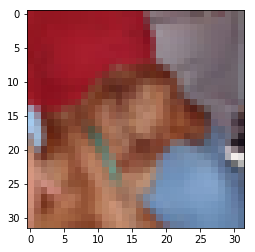

Gradcam


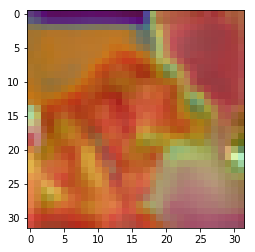

ship
Original


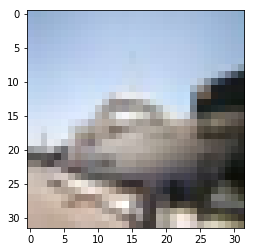

Gradcam


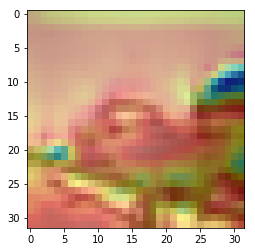

deer
Original


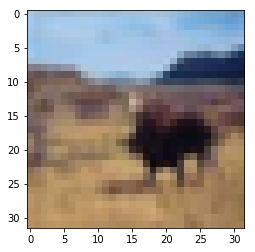

Gradcam


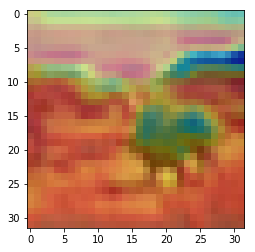

dog
Original


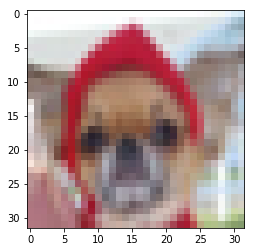

Gradcam


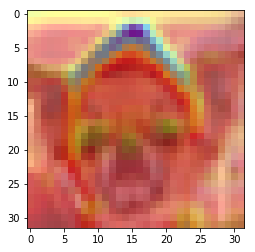

airplane
Original


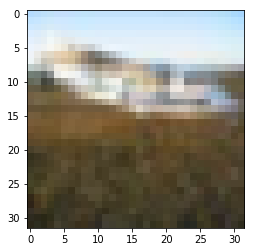

Gradcam


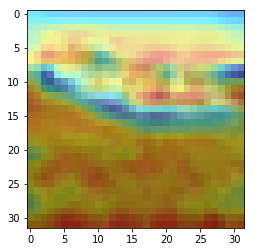

truck
Original


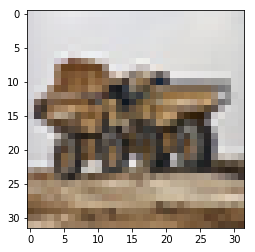

Gradcam


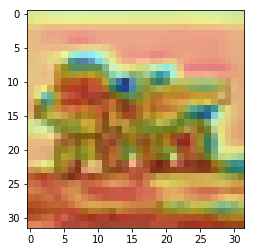

dog
Original


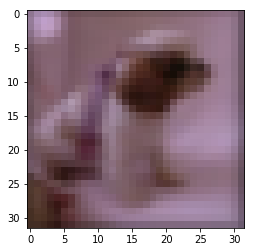

Gradcam


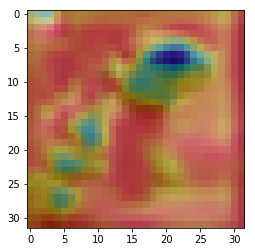

airplane
Original


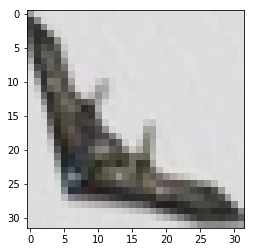

Gradcam


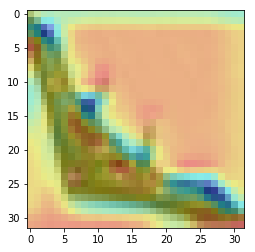

cat
Original


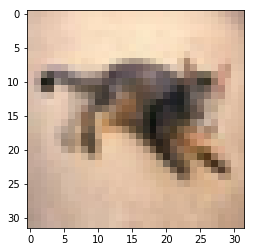

Gradcam


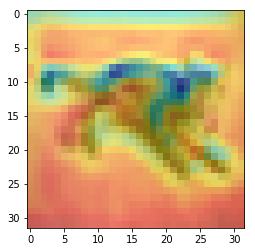

cat
Original


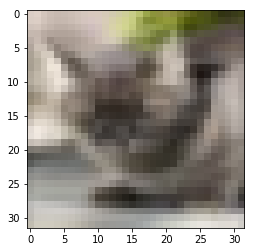

Gradcam


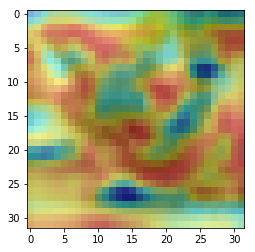

deer
Original


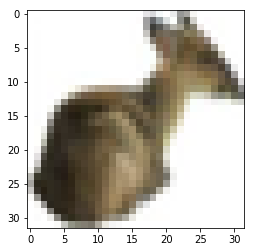

Gradcam


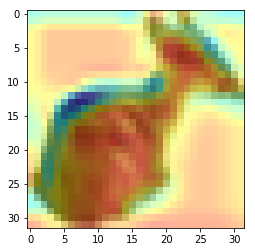

airplane
Original


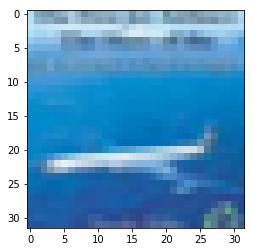

Gradcam


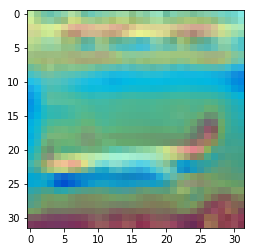

bird
Original


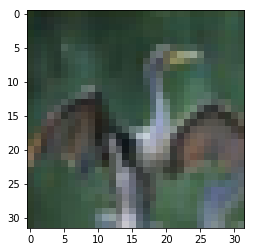

Gradcam


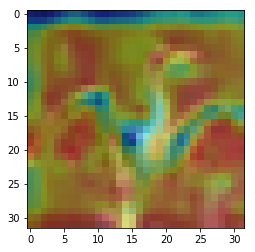

dog
Original


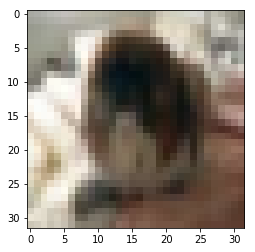

Gradcam


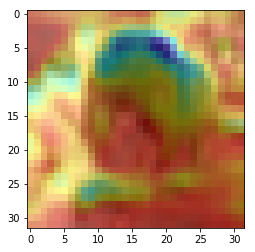

truck
Original


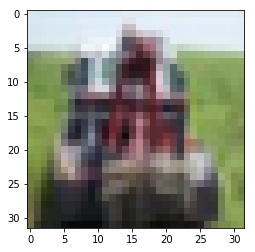

Gradcam


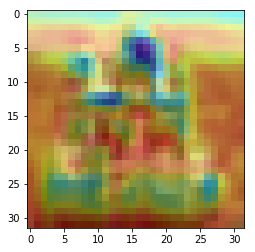

ship
Original


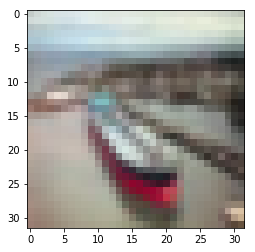

Gradcam


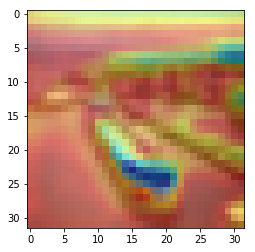

airplane
Original


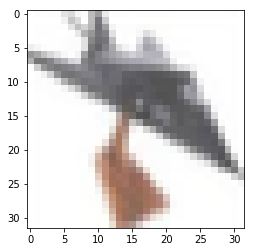

Gradcam


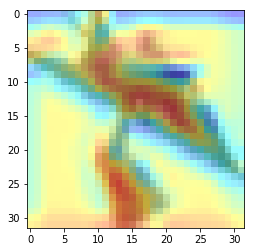

cat
Original


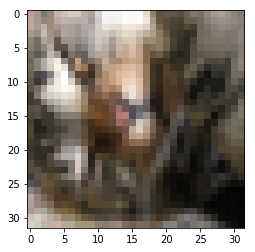

Gradcam


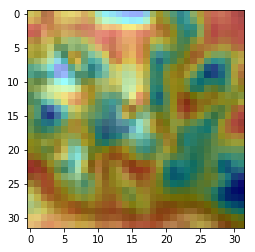

horse
Original


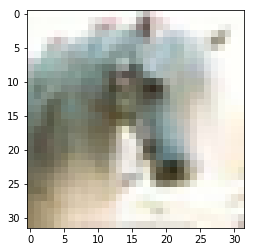

Gradcam


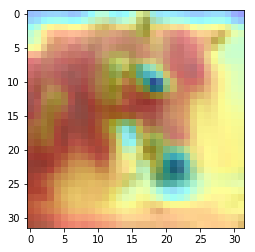

In [43]:
for im in range(50):
  img = test_features[mis[im]]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("activation_1")#("separable_conv2d_2")

#   print(preds)

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(24):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # img = cv2.imread(img_path)
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  # from google.colab.patches import cv2_imshow
  # idx = np.where(train_labels[:]==5)[0]
  # features_idx = train_features[idx,::]
  # img_num = np.random.randint(features_idx.shape[0])
  # img = features_idx[img_num]

  img = test_features[mis[im]]
  # img = np.array(img)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  # cv2.imshow(img)
  # cv2.imshow(superimposed_img)
  # cv2.waitKey(0)
#   plt.subplot(50, 2, im)
#   plt.subplot(1,2)
  print(class_names[int(test_labels[mis[im]])])
  print('Original')
  plt.imshow(img)
  plt.show()
  print('Gradcam')
  plt.imshow(superimposed_img)
  plt.show()
  
  
#   fig = plt.figure(figsize=(8,3))
# for i in range(num_classes):
#     ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
#     idx = np.where(train_labels[:]==i)[0]
#     features_idx = train_features[idx,::]
#     img_num = np.random.randint(features_idx.shape[0])
#     im = features_idx[img_num]
#     ax.set_title(class_names[i])
#     plt.imshow(im)
# plt.show()